## Week 8: Hands On Session Lab

Using this Jupyter Notebook, practice along with tasks below:
- Run the below code to include all the functions to calculate permutation entropy and complexity


In [ ]:
pip install --upgrade numpy

In [1]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

## Application

In [8]:
pip install ordpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Generating a time series with sine values
import math
time_series = []
for i in range(365):
    value = math.sin(math.radians(i))  # Example with sine function
    time_series.append(value)

<AxesSubplot:>

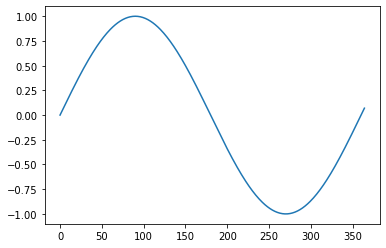

In [10]:
# Plot time series
import seaborn as sns
sns.lineplot(time_series)

In [11]:
# Compute ordinal patterns with embedding dimension = 3 and embedding delay = 1
op_timeseries = ordinal_patterns(time_series, 3, 1)

In [12]:
# Compute permutation entropy
pe_timeseries = p_entropy(op_timeseries)
print(pe_timeseries)

0.5246103226528828


In [13]:
# Compute complexity
complexity_timeseries = complexity(op_timeseries)
print(complexity_timeseries)

0.278165029229025


## Submit your Practice Activity

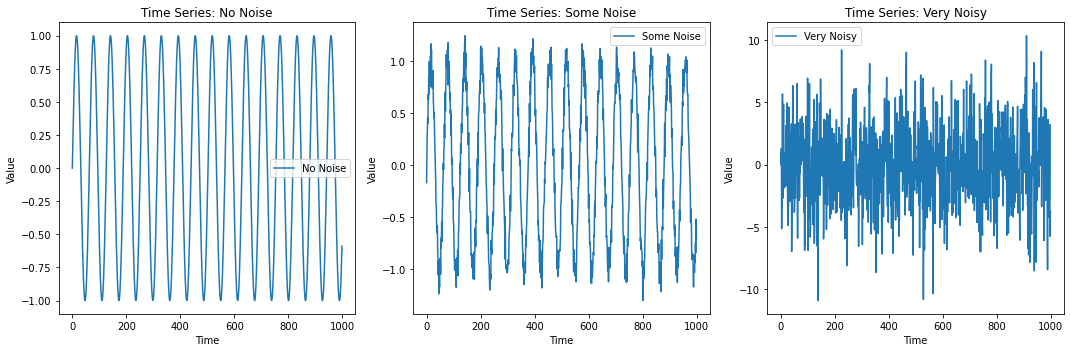

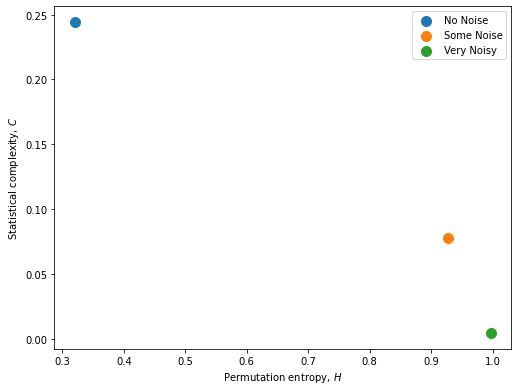

In [14]:

import numpy as np
import ordpy
from matplotlib import pylab as plt


# Function to generate time series with different levels of noise

def generate_time_series(noise_level):
    time = np.arange(1000)
    # No noise
    no_noise_series = np.sin(0.1 * time)
    # Little noise
    some_noise_series = np.sin(0.1 * time) + 0.1 * np.random.randn(1000)
    # Lot of noise
    very_noisy_series = np.sin(0.1 * time) + 1.0 * np.random.randn(1000)
    # Add more noise to very_noisy_series if needed
    if noise_level == 'lot':
        very_noisy_series += 3.0 * np.random.randn(1000)
    return [no_noise_series, some_noise_series, very_noisy_series]

# Generate time series with different noise levels
time_series = generate_time_series(noise_level='lot')

# Calculate Complexity-Entropy Pairs
HC = [ordpy.complexity_entropy(series, dx=4) for series in time_series]

# Plot Time Series
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
for series, label, ax in zip(time_series, ['No Noise', 'Some Noise', 'Very Noisy'], axarr):
    ax.plot(series, label=label)
    ax.set_title(f'Time Series: {label}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
plt.tight_layout()
plt.show()

# Plot Complexity-Entropy Plane
f, ax = plt.subplots(figsize=(8.19, 6.3))
for HC_, label_ in zip(HC, ['No Noise', 'Some Noise', 'Very Noisy']):
    ax.scatter(*HC_, label=label_, s=100)
    ax.set_xlabel('Permutation entropy, $H$')
    ax.set_ylabel('Statistical complexity, $C$')
    ax.legend()
plt.show()


Nice work! You've wrapped up this hands-on coding session.   
Please select Submit Assignment at the top of your lab to receive a score for your work.  